# Multi-Lambda

In [1]:
using MMJMesh
using MMJMesh.Meshes
using MMJMesh.Plots
using LinearAlgebra
using SparseArrays

include("fem.jl")
include("heat.jl")

import CairoMakie
CairoMakie.update_theme!(colormap=:acton)

## Mesh

MakieCore.Plot{MMJMesh.Plots.mplot, Tuple{Mesh{2, 2, MMJMesh.Geometries.GeometricObjectI, MMJMesh.Geometries.GeometricObjectI}}}


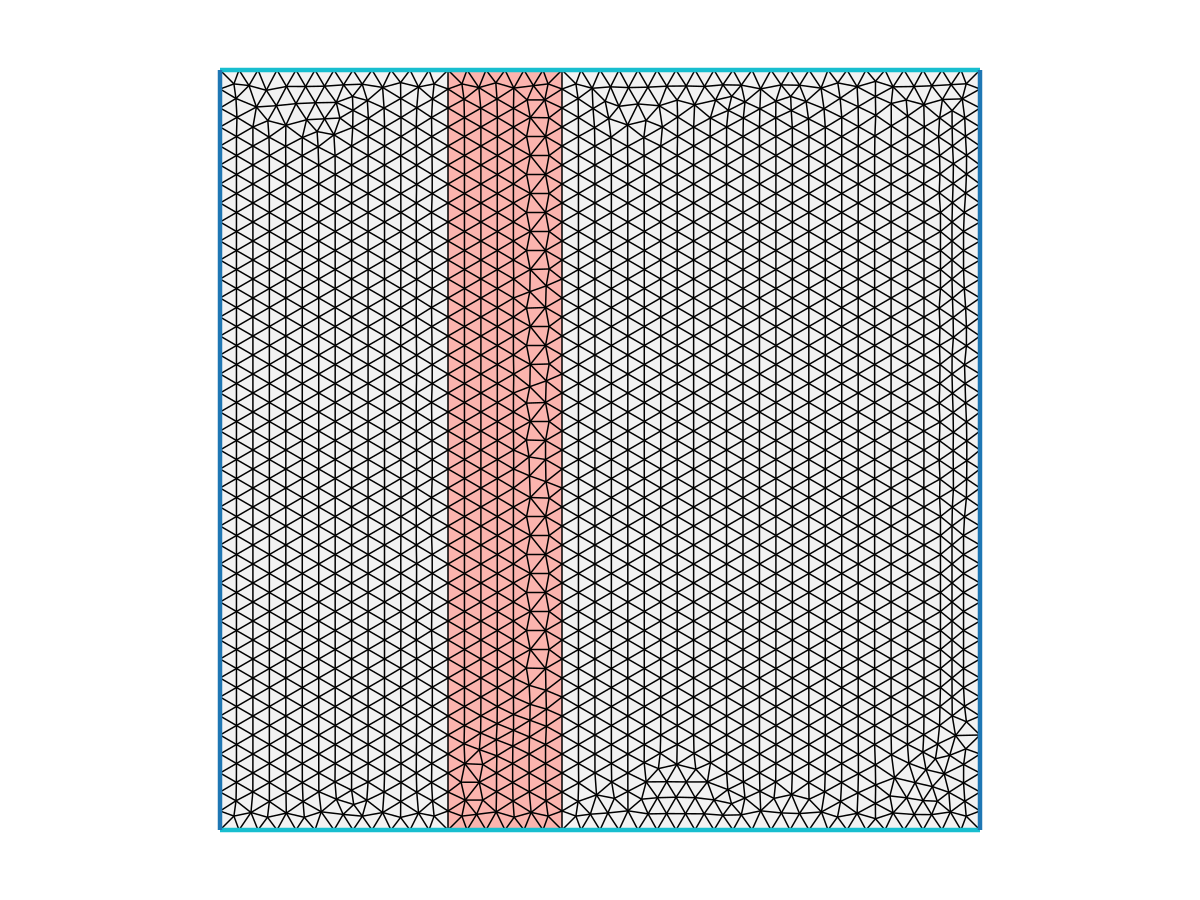

In [2]:
m = Mesh("gmsh/multi-lambda.msh")
mplot(m, edgesvisible=true) |> mconf()

## Solution

### Define problem

In [7]:
setdata!(group(m, :S1), :ke_func, heat_ke(1))
setdata!(group(m, :S2), :ke_func, heat_ke(20))
setdata!(group(m, :elements), :re_func, heat_re(250))

### Set up and solve linear system

In [4]:
K, r = assemble_kr(m)
apply_dirichlet_bcs!(K, r, m.groups[:ΓD0]);
θHat =  K \ r;

### Plot

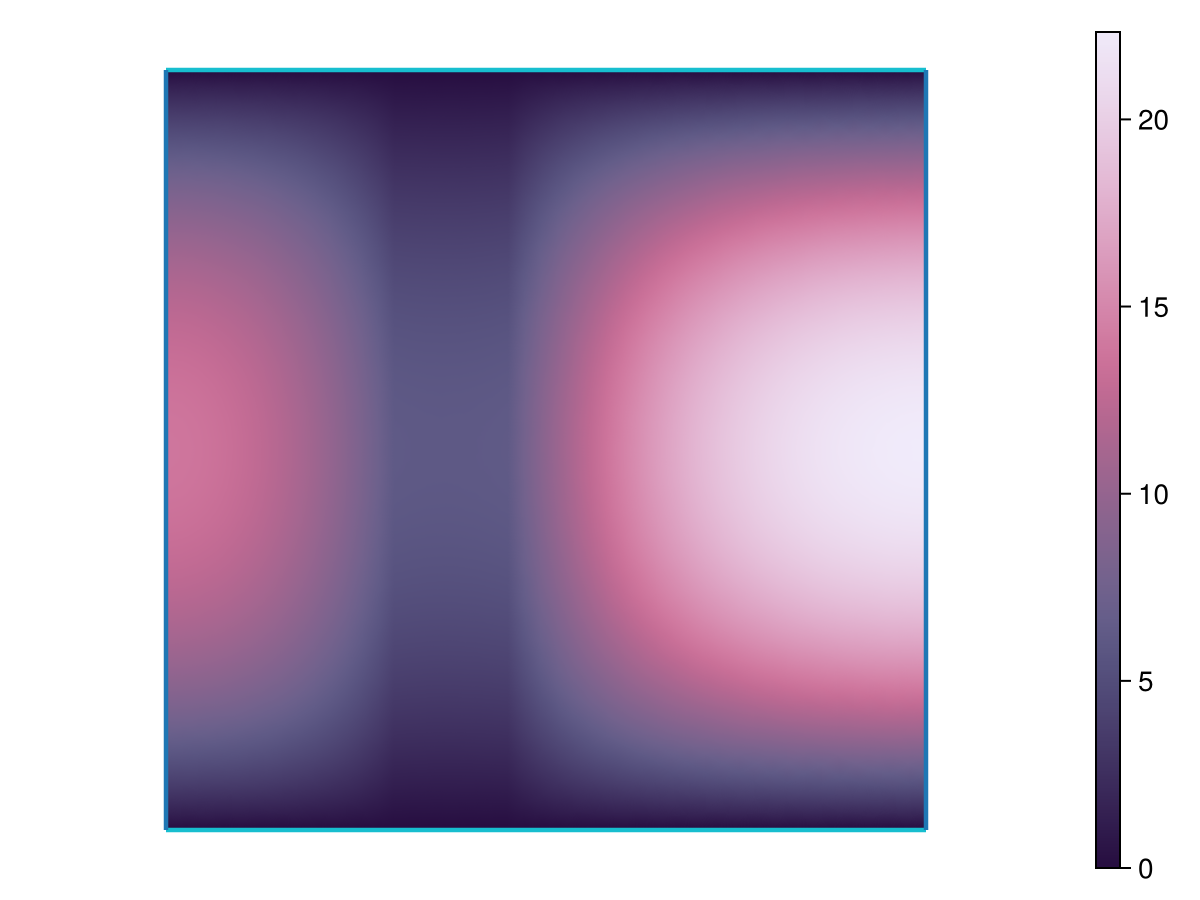

In [9]:
mplot(m, θHat) |> mconf()